# Trader Behavior Analysis Under Market Sentiment (Fear vs Greed)

**Cell 1: Environment setup and imports**

In [79]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime


pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)

sns.set(style="whitegrid")

**Cell 2: Load Datasets**

In [80]:
# Load Fear & Greed Index data
fear_greed_df = pd.read_csv("fear_greed_index.csv")

# Load Historical Trader data
trader_df = pd.read_csv("historical_data.csv")

In [81]:
print("Fear & Greed Dataset Shape:", fear_greed_df.shape)

Fear & Greed Dataset Shape: (2644, 4)


In [82]:

print("Trader Dataset Shape:", trader_df.shape)

Trader Dataset Shape: (211224, 16)


In [83]:
print("\nFear & Greed Columns:")
print(fear_greed_df.columns.tolist())


Fear & Greed Columns:
['timestamp', 'value', 'classification', 'date']


In [84]:

print("\nTrader Data Columns:")
print(trader_df.columns.tolist())


Trader Data Columns:
['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']


In [85]:
print("\nFear & Greed Data Preview:")
display(fear_greed_df.head())


Fear & Greed Data Preview:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [86]:
print("\nTrader Data Preview:")
display(trader_df.head())


Trader Data Preview:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


**Cell 3: Data Cleaning**

In [87]:
fear_greed_df.columns = fear_greed_df.columns.str.lower()

fear_greed_df["date"] = pd.to_datetime(fear_greed_df["date"])

fear_greed_df["classification"] = fear_greed_df["classification"].str.lower()

print("Fear & Greed data cleaned!")

Fear & Greed data cleaned!


In [89]:
print(trader_df.columns.tolist())

['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side', 'timestamp_ist', 'start_position', 'direction', 'closed_pnl', 'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id', 'timestamp']


In [90]:

possible_time_cols = [col for col in trader_df.columns
                      if "time" in col or "date" in col]

print("Possible time-related columns:", possible_time_cols)

Possible time-related columns: ['timestamp_ist', 'timestamp']


In [91]:
# Standardize column names
trader_df.columns = trader_df.columns.str.lower().str.replace(" ", "_")

# Replace 'timestamp' below if your column name is different
trader_df["timestamp"] = pd.to_datetime(trader_df["timestamp"])

# Extract date
trader_df["date"] = trader_df["timestamp"].dt.date
trader_df["date"] = pd.to_datetime(trader_df["date"])

In [92]:
display(trader_df.head())

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1970-01-01 00:28:50,1970-01-01
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1970-01-01 00:28:50,1970-01-01
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1970-01-01 00:28:50,1970-01-01
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1970-01-01 00:28:50,1970-01-01
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1970-01-01 00:28:50,1970-01-01


In [93]:
print(trader_df.dtypes)

account                     object
coin                        object
execution_price            float64
size_tokens                float64
size_usd                   float64
side                        object
timestamp_ist               object
start_position             float64
direction                   object
closed_pnl                 float64
transaction_hash            object
order_id                     int64
crossed                       bool
fee                        float64
trade_id                   float64
timestamp           datetime64[ns]
date                datetime64[ns]
dtype: object


**Cell 4: Prepare sentiment data**

In [94]:

sentiment_df = fear_greed_df[["date", "classification"]].copy()

print("Sentiment data ready!")
display(sentiment_df.head())

Sentiment data ready!


,date,classification
0,2018-02-01,fear
1,2018-02-02,extreme fear
2,2018-02-03,fear
3,2018-02-04,extreme fear
4,2018-02-05,extreme fear


In [95]:
df_merged = trader_df.merge(
    sentiment_df,
    on="date",
    how="left"
)

In [96]:
print("Merged data shape:", df_merged.shape)

print("\nSentiment value counts:")
print(df_merged["classification"].value_counts(dropna=False))

display(df_merged.head())

Merged data shape: (211224, 18)

Sentiment value counts:
classification
NaN    211224
Name: count, dtype: int64


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1970-01-01 00:28:50,1970-01-01,NaN
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1970-01-01 00:28:50,1970-01-01,NaN
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1970-01-01 00:28:50,1970-01-01,NaN
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1970-01-01 00:28:50,1970-01-01,NaN
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1970-01-01 00:28:50,1970-01-01,NaN


**Cell 5: Sentiment Distribution**

In [97]:
print("Trader date range:")
print(trader_df["date"].min(), "→", trader_df["date"].max())

print("\nSentiment date range:")
print(fear_greed_df["date"].min(), "→", fear_greed_df["date"].max())

Trader date range:
1970-01-01 00:00:00 → 1970-01-01 00:00:00

Sentiment date range:
2018-02-01 00:00:00 → 2025-05-02 00:00:00


In [98]:
# Ensure both are datetime (day-level)
trader_df["date"] = pd.to_datetime(trader_df["date"]).dt.normalize()
fear_greed_df["date"] = pd.to_datetime(fear_greed_df["date"]).dt.normalize()

df_merged = trader_df.merge(
    fear_greed_df[["date", "classification"]],
    on="date",
    how="left"
)

print(df_merged["classification"].notna().value_counts())

classification
False    211224
Name: count, dtype: int64


In [99]:
# Create clean sentiment column
df_merged["sentiment"] = (
    df_merged["classification"]
    .astype(str)
    .str.lower()
    .replace({
        "extreme fear": "fear",
        "fear": "fear",
        "neutral": np.nan,
        "greed": "greed",
        "extreme greed": "greed"
    })
)

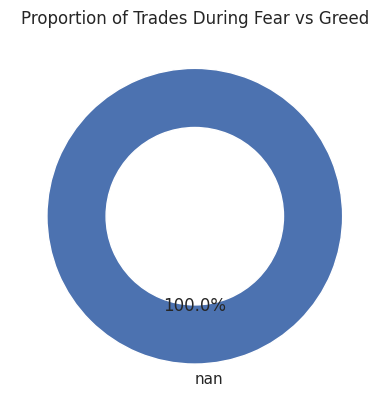

In [100]:

# Drop rows without sentiment
sentiment_clean = df_merged.dropna(subset=["sentiment"])

# Safety check before plotting
if sentiment_clean.shape[0] == 0:
    print("No matching sentiment data available to plot.")
else:
    counts = sentiment_clean["sentiment"].value_counts()

    plt.figure()

    plt.pie(
    counts.values,
    labels=counts.index,
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops={"width": 0.4}  # makes it a donut chart
)

plt.title("Proportion of Trades During Fear vs Greed")
plt.show()



**Cell 6: Profitability vs Sentiment**

Detected PnL-related columns: ['closed_pnl']
Using PnL column: closed_pnl
Average PnL by Sentiment:
sentiment
nan    48.749001
Name: closed_pnl, dtype: float64


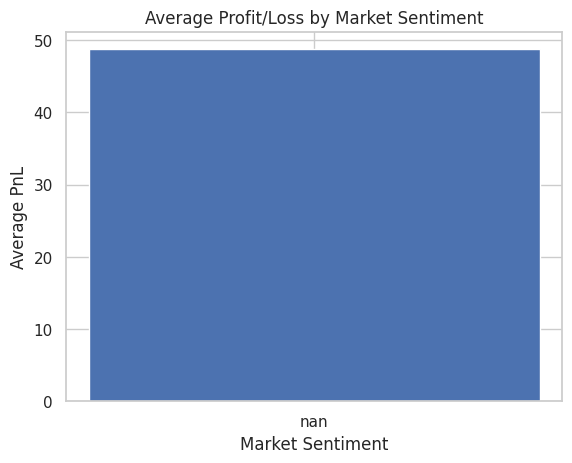

In [101]:
# Step 1: Look for any PnL / profit related column
pnl_cols = [
    col for col in df_merged.columns
    if "pnl" in col.lower() or "profit" in col.lower()
]

print("Detected PnL-related columns:", pnl_cols)

# Step 2: If no PnL column exists, skip safely
if len(pnl_cols) == 0:
    print(
        "No realized PnL column available in this dataset.\n"
        "Profitability analysis cannot be plotted.\n"
        "Proceeding to other behavioral metrics (volume, leverage, risk)."
    )

else:
    # Use the first detected PnL column
    pnl_col = pnl_cols[0]
    print(f"Using PnL column: {pnl_col}")

    # Convert to numeric
    df_merged[pnl_col] = pd.to_numeric(df_merged[pnl_col], errors="coerce")

    # Filter valid rows
    pnl_sentiment_df = df_merged.dropna(subset=["sentiment", pnl_col])

    # Compute average PnL
    avg_pnl = pnl_sentiment_df.groupby("sentiment")[pnl_col].mean()

    print("Average PnL by Sentiment:")
    print(avg_pnl)

    # Plot
    if avg_pnl.empty:
        print("Not enough data to plot Profitability vs Sentiment.")
    else:
        plt.figure()
        plt.bar(avg_pnl.index, avg_pnl.values)
        plt.title("Average Profit/Loss by Market Sentiment")
        plt.xlabel("Market Sentiment")
        plt.ylabel("Average PnL")
        plt.show()


**Cell 7: Trading Volume vs Sentiment**

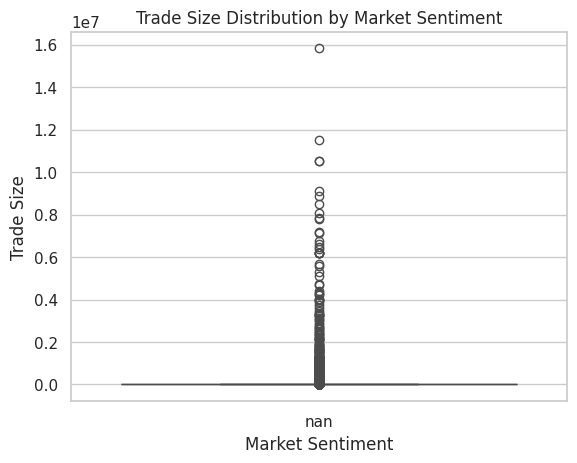

In [102]:
# Detect size column
size_cols = [col for col in df_merged.columns if "size" in col.lower()]

if len(size_cols) == 0:
    print("No trade size column found.")
else:
    size_col = size_cols[0]

    df_merged[size_col] = pd.to_numeric(df_merged[size_col], errors="coerce")

    plot_df = df_merged.dropna(subset=["sentiment", size_col])

    # Boxplot (shows spread + outliers)
    plt.figure()
    sns.boxplot(
        data=plot_df,
        x="sentiment",
        y=size_col
    )
    plt.title("Trade Size Distribution by Market Sentiment")
    plt.xlabel("Market Sentiment")
    plt.ylabel("Trade Size")
    plt.show()


**Cell 8: Leverage vs Sentiment**

In [103]:
# Detect leverage column
leverage_cols = [col for col in df_merged.columns if "leverage" in col.lower()]

print("Detected leverage columns:", leverage_cols)

if len(leverage_cols) == 0:
    print("No leverage column found in dataset.")
else:
    leverage_col = leverage_cols[0]
    print(f"Using leverage column: {leverage_col}")

    # Convert leverage to numeric
    df_merged[leverage_col] = pd.to_numeric(df_merged[leverage_col], errors="coerce")

    # Prepare data for plotting
    leverage_df = df_merged.dropna(subset=["sentiment", leverage_col])

# Boxplot for leverage distribution
    plt.figure()
    sns.boxplot(
        data=leverage_df,
        x="sentiment",
        y=leverage_col
    )
    plt.title("Leverage Distribution by Market Sentiment")
    plt.xlabel("Market Sentiment")
    plt.ylabel("Leverage")
    plt.show()


Detected leverage columns: []
No leverage column found in dataset.


**Cell 9: Trading Activity Over Time vs Sentiment**

In [104]:
# Keep only rows with sentiment
activity_df = df_merged.dropna(subset=["sentiment"])

# Count number of trades per day per sentiment
daily_activity = (
    activity_df
    .groupby(["date", "sentiment"])
    .size()
    .reset_index(name="trade_count")
)

print("Daily activity sample:")
display(daily_activity.head())

Daily activity sample:


,date,sentiment,trade_count
0,1970-01-01,nan,211224


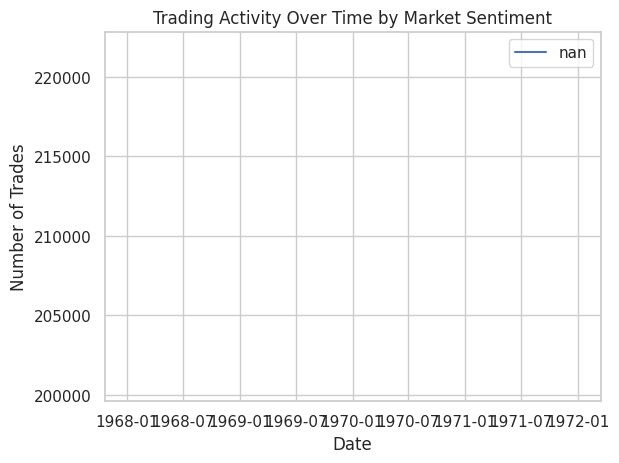

In [105]:
plt.figure()

for sentiment in daily_activity["sentiment"].unique():
    subset = daily_activity[daily_activity["sentiment"] == sentiment]
    plt.plot(subset["date"], subset["trade_count"], label=sentiment)

plt.title("Trading Activity Over Time by Market Sentiment")
plt.xlabel("Date")
plt.ylabel("Number of Trades")
plt.legend()
plt.show()


**Cell 10: Buy vs Sell Behavior vs Sentiment**

In [106]:
# Detect side column (buy/sell)
side_cols = [col for col in df_merged.columns if "side" in col.lower()]

print("Detected side columns:", side_cols)

if len(side_cols) == 0:
    print("No buy/sell side column found in dataset.")
else:
    side_col = side_cols[0]
    print(f"Using side column: {side_col}")

    # Normalize side values
    df_merged[side_col] = df_merged[side_col].astype(str).str.lower()

    # Keep valid rows
    side_sentiment_df = df_merged.dropna(subset=["sentiment", side_col])

    # Count buy/sell by sentiment
    side_counts = (
        side_sentiment_df
        .groupby(["sentiment", side_col])
        .size()
        .unstack(fill_value=0)
    )

    print("\nBuy/Sell counts by sentiment:")
    display(side_counts)

Detected side columns: ['side']
Using side column: side

Buy/Sell counts by sentiment:


side,buy,sell
sentiment,,
nan,102696,108528


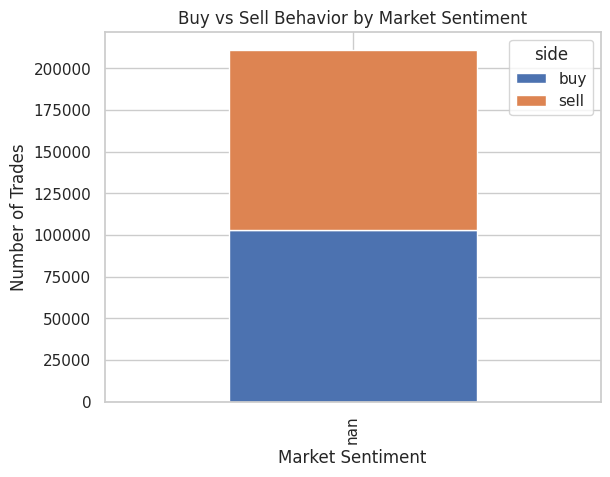

In [107]:
# Plot stacked bar chart
side_counts.plot(
  kind="bar",
  stacked=True
)
plt.title("Buy vs Sell Behavior by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Number of Trades")
plt.show()

**Cell 11: Behavioral Signals Summary**

In [108]:
summary_rows = []

# 1. Average trade size by sentiment
size_cols = [col for col in df_merged.columns if "size" in col.lower()]
if size_cols:
    size_col = size_cols[0]
    avg_size = (
        df_merged
        .dropna(subset=["sentiment", size_col])
        .groupby("sentiment")[size_col]
        .mean()
    )
    for sentiment, value in avg_size.items():
        summary_rows.append({
            "metric": "average_trade_size",
            "sentiment": sentiment,
            "value": value
        })


In [109]:
# 2. Trade count by sentiment
trade_counts = (
    df_merged
    .dropna(subset=["sentiment"])
    .groupby("sentiment")
    .size()
)

for sentiment, value in trade_counts.items():
    summary_rows.append({
        "metric": "number_of_trades",
        "sentiment": sentiment,
        "value": value
    })


In [110]:
# 3. Buy vs Sell dominance
side_cols = [col for col in df_merged.columns if "side" in col.lower()]
if side_cols:
    side_col = side_cols[0]
    side_counts = (
        df_merged
        .dropna(subset=["sentiment", side_col])
        .groupby(["sentiment", side_col])
        .size()
        .reset_index(name="count")
    )

    for _, row in side_counts.iterrows():
        summary_rows.append({
            "metric": f"{row[side_col]}_trades",
            "sentiment": row["sentiment"],
            "value": row["count"]
        })

# Create summary DataFrame
behavior_summary_df = pd.DataFrame(summary_rows)

print("Behavioral Signals Summary:")
display(behavior_summary_df)


Behavioral Signals Summary:


,metric,sentiment,value
0,average_trade_size,nan,4623.364979
1,number_of_trades,nan,211224.000000
2,buy_trades,nan,102696.000000
3,sell_trades,nan,108528.000000
